<a href="https://colab.research.google.com/github/elenakelly/EurovisionTextAnalysis/blob/main/BERTopic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install transformers

In [ ]:
!pip install bertopic

In [157]:
import pandas as pd

In [158]:
df = pd.read_csv('merged.csv')
print(df.head())

              Song                                     English Lyrics
0          Refrain  Chorus of love, or or or or\nChorus, color of ...
1     Net als toen  Don’t be so drowsy with that eternal paper\n D...
2  Dors, mon amour  Sleep, my love\n The sun is still far from the...
3       Een beetje  I wanted your heart to be a closet with a litt...
4      Tom Pillibi  Tom Pillibi\nTom Pillibi has two castles – the...


In [159]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [201]:
import re
from nltk.corpus import stopwords

def preprocess(text):
    stop_words = set(stopwords.words('english')) 
    text = text.lower()  # Lowercase
    text = re.sub(r'\[.*?\]', '', text) # Remove text inside inside of brackets
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = " ".join([word for word in text.split() if word not in stop_words]) # Remove stopwords
    text = " ".join([word for word in text.split() if len(word) > 2]) # Remove two-letter words
    
    return text

text = df['English Lyrics'].apply(preprocess)


In [202]:
print(text)

0     chorus love chorus color sky fragrance twentie...
1     dont drowsy eternal paper dont yawn sleep bore...
2     sleep love sun still far day time love night u...
3     wanted heart closet little door could look lit...
4     tom pillibi tom pillibi two castles first one ...
                            ...                        
59    dont tell gods left mess cant undo done lets r...
60    strangers coming come house kill say guilty gu...
61    one day someone asks say lived love existed ti...
62    ree ouch hey ree ouch hey ree ree ouch ouch ou...
63    oohoohooh oohooh oohooh oohoohooh oohooh oohoo...
Name: English Lyrics, Length: 64, dtype: object


In [207]:
# Initialize BERTopic
topic_model = BERTopic(embedding_model="bert-base-uncased",nr_topics=25)

# Fit the model on your corpus
topics, _ = topic_model.fit_transform(text)


Some weights of the model checkpoint at /root/.cache/torch/sentence_transformers/bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [209]:
# Show the topics
freq = topic_model.get_topic_info() 
freq

,Topic,Count,Name
0,-1,22,-1_love_let_light_life
1,0,11,0_rock_hallelujah_hey_viva
2,1,17,1_love_youre_cause_know
3,2,14,2_voice_child_doll_see


In [210]:
similar_topics, similarity = \
topic_model.find_topics("love", top_n = 3) 


print("Most Similar Topic Info: \n{}".format(topic_model.get_topic(similar_topics[0])))
print("Similarity Score: {}".format(similarity[0]))

Most Similar Topic Info: 
[('voice', 0.08476732730032316), ('child', 0.07443745742344564), ('doll', 0.07298552307610341), ('see', 0.07117042150496544), ('love', 0.07104158526936968), ('heaven', 0.0597077108894773), ('life', 0.05793213317753936), ('take', 0.05463049862089985), ('sleep', 0.049764881716228705), ('heart', 0.049561421182840654)]
Similarity Score: 0.8988922598275331


In [211]:
topic_freq = topic_model.get_topic_freq()

for i in range(len(topic_freq)):
    topic_id = topic_freq['Topic'].iloc[i]
    print(f"Topic {topic_id}: {topic_model.get_topic(topic_id)}")



Topic -1: [('love', 0.09091595952530053), ('let', 0.06881275437769335), ('light', 0.05182895964783272), ('life', 0.04819038097036038), ('little', 0.042618768694872106), ('come', 0.04000239081103217), ('never', 0.038159805735198185), ('like', 0.037707309774607414), ('bit', 0.03647255589987225), ('lei', 0.03567730358388271)]
Topic 1: [('love', 0.09147495093213154), ('youre', 0.07054696823521256), ('cause', 0.06247486092483208), ('know', 0.05742839929358013), ('dont', 0.05732917374749832), ('ill', 0.053736708354403966), ('one', 0.050082524560573737), ('believe', 0.04744360979120411), ('gotta', 0.0469243840479834), ('way', 0.04518439027733725)]
Topic 2: [('voice', 0.08476732730032316), ('child', 0.07443745742344564), ('doll', 0.07298552307610341), ('see', 0.07117042150496544), ('love', 0.07104158526936968), ('heaven', 0.0597077108894773), ('life', 0.05793213317753936), ('take', 0.05463049862089985), ('sleep', 0.049764881716228705), ('heart', 0.049561421182840654)]
Topic 0: [('rock', 0.1082

In [212]:
topic_model.visualize_barchart()

In [213]:
topic_model.visualize_heatmap( )

In [1]:
#model.visualize_topics( )

In [87]:
from transformers import pipeline

# Initialize the sentiment analysis pipeline
nlp = pipeline('sentiment-analysis')

# Apply sentiment analysis to each song's lyrics
sentiments = [nlp(lyrics[:512])[0] for lyrics in texts]

# Extract sentiment labels
sentiment_labels = [result['label'] for result in sentiments]


No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Xformers is not installed correctly. If you want to use memorry_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.


In [30]:
from collections import Counter

# Count each topic's occurrences
topic_counts = Counter(topics)

# Count each sentiment's occurrences
sentiment_counts = Counter(sentiment_labels)

# Print the most common topics and sentiments
print('Most common topics:', topic_counts.most_common(5))
print('Most common sentiments:', sentiment_counts.most_common(5))


Most common topics: [(0, 27), (1, 22), (-1, 15)]
Most common sentiments: [('POSITIVE', 48), ('NEGATIVE', 16)]


In [31]:
print(f"Length of topics: {len(topics)}")
print(f"Length of sentiment labels: {len(sentiment_labels)}")


Length of topics: 64
Length of sentiment labels: 64


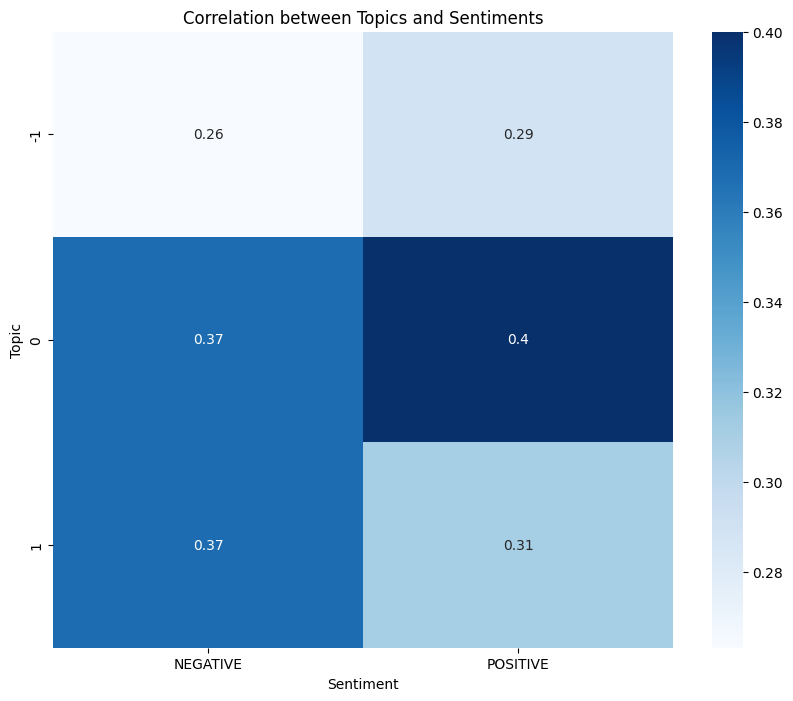

In [117]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame with your data
# For the sake of the example, let's assume 'topics' and 'sentiment_labels' are your lists of topics and sentiment labels
df = pd.DataFrame({
    'Topic': topics,
    'Sentiment': sentiment_labels
})

# Create a cross-tabulation of topics and sentiments
crosstab = pd.crosstab(df['Topic'], df['Sentiment'])

# Normalize the cross-tabulation to show proportions
crosstab_norm = crosstab / crosstab.sum()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(crosstab_norm, cmap='Blues', annot=True)
plt.title('Correlation between Topics and Sentiments')
plt.show()


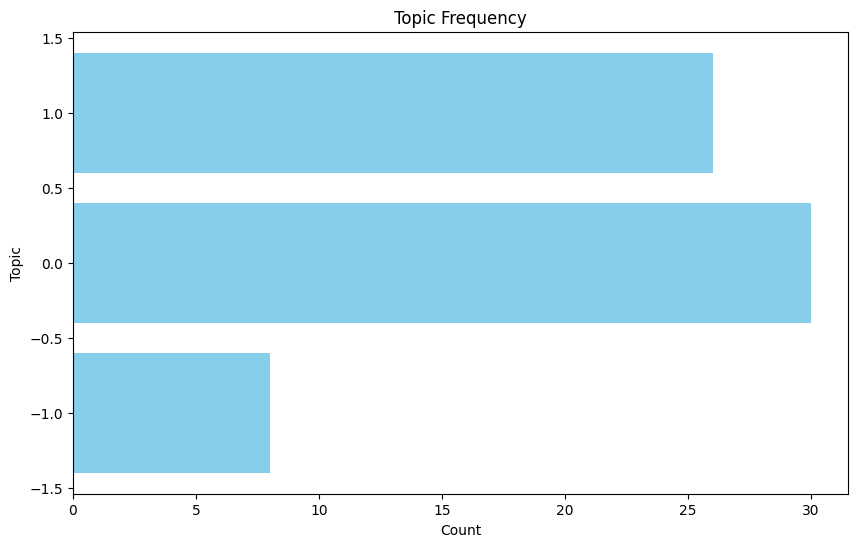

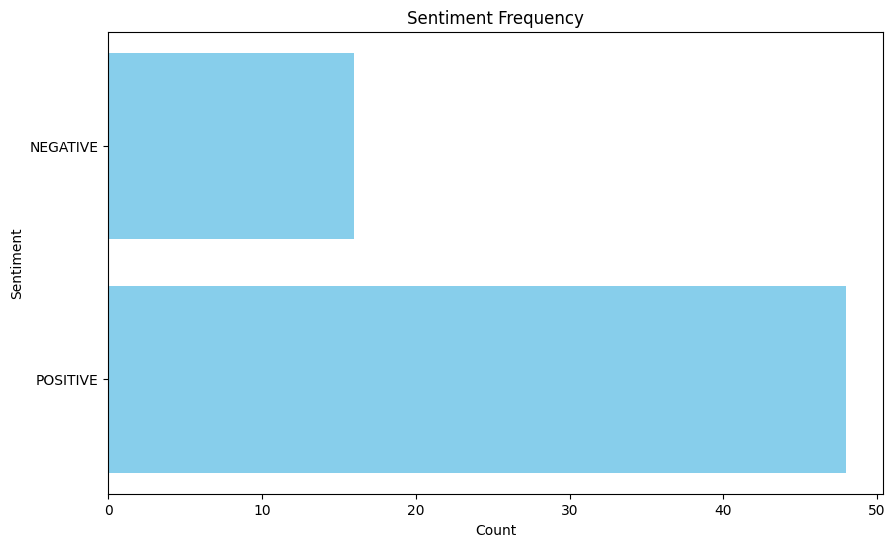

In [15]:
import matplotlib.pyplot as plt

# Separate keys and values for plotting
topics = list(topic_counts.keys())
topic_counts = list(topic_counts.values())
sentiments = list(sentiment_counts.keys())
sentiment_counts = list(sentiment_counts.values())

# Plot the topic data
plt.figure(figsize=(10, 6))
plt.barh(topics, topic_counts, color='skyblue')
plt.xlabel('Count')
plt.ylabel('Topic')
plt.title('Topic Frequency')
plt.show()

# Plot the sentiment data
plt.figure(figsize=(10, 6))
plt.barh(sentiments, sentiment_counts, color='skyblue')
plt.xlabel('Count')
plt.ylabel('Sentiment')
plt.title('Sentiment Frequency')
plt.show()
